In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Import Other
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

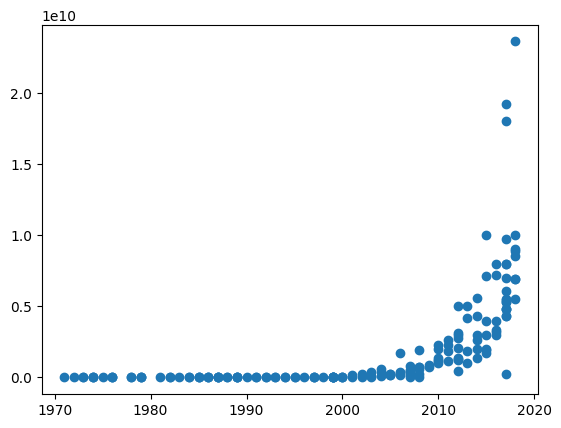

In [4]:
# Plot the data - exponential!
plt.scatter(X, y)

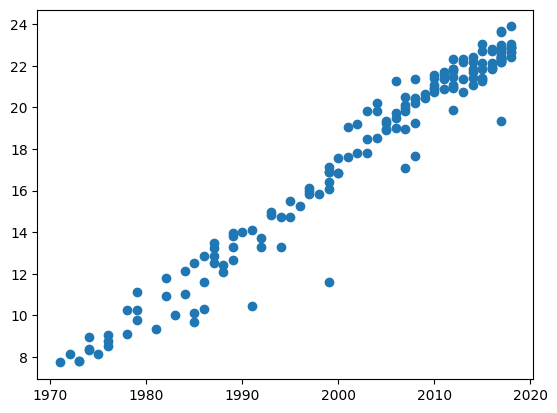

In [5]:
# Since we want a linear model, let's take the log
y = np.log(y)
plt.scatter(X, y)

In [6]:
# Let's also center the X data so the values are not too large
# We could scale it too, but then we'd have to reverse the transformation later
X = X - X.mean()

In [7]:
# TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 497.2010 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 301.5715 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 296.5082 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 202.0381 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 190.6069 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 142.5653 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 92.7362 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 66.5142 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 57.1652 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 47.9144 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 3

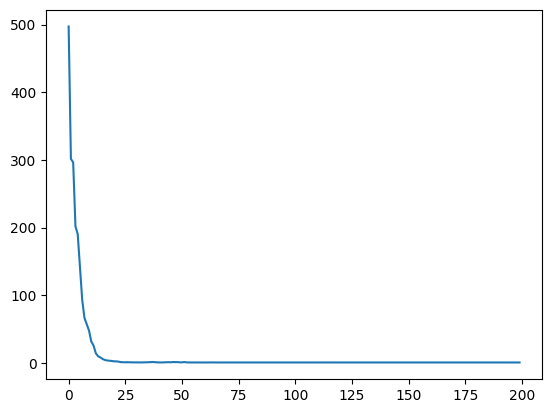

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [9]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34474978]], dtype=float32), array([17.763842], dtype=float32)]


In [10]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0, 0]

In [11]:
print("Time to double:", np.log(2) / a)

Time to double: 2.010580495678458


In [12]:
# If you know the analytical solution
X = np.array(X).flatten()
y = np.array(y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(y) - y.mean() * X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204
